
# REGRESSÃO LINEAR SIMPLES - CONSUMO DE COMBUSTÍVEL



# PROBLEMA

- You have been hired as a consultant to a major Automotive Manufacturer and you have been tasked to develop a model to predict the impact of increasing the vehicle horsepower (HP) on fuel economy (Mileage Per Gallon (MPG)). You gathered the data:
- Data set:
    - Independant variable X: Vehicle Horse Power 
    - Dependant variable Y: Mileage Per Gallon (MPG) 

# PASSO 1: IMPORTAR BIBLIOTECAS


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# PASSO 2: IMPORTAR DATASET

In [2]:
fuel = pd.read_csv('FuelEconomy.csv')

In [3]:
fuel

,Horse Power,Fuel Economy (MPG)
0,118.770799,29.344195
1,176.326567,24.695934
2,219.262465,23.952010
3,187.310009,23.384546
4,218.594340,23.426739
...,...,...
95,162.810542,27.418661
96,266.869640,15.989945
97,243.831211,19.253375
98,140.959803,29.515593


In [4]:
fuel.head(5)

,Horse Power,Fuel Economy (MPG)
0,118.770799,29.344195
1,176.326567,24.695934
2,219.262465,23.952010
3,187.310009,23.384546
4,218.594340,23.426739


In [5]:
# Posso colocar .T para transpor o dataframe

fuel.describe().T

,count,mean,std,min,25%,50%,75%,max
Horse Power,100.0,213.676190,62.061726,50.0,174.996514,218.928402,251.706476,350.0
Fuel Economy (MPG),100.0,23.178501,4.701666,10.0,20.439516,23.143192,26.089933,35.0


In [6]:
fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Horse Power         100 non-null    float64
 1   Fuel Economy (MPG)  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


# PASSO 3: VISUALIZAR DATASET

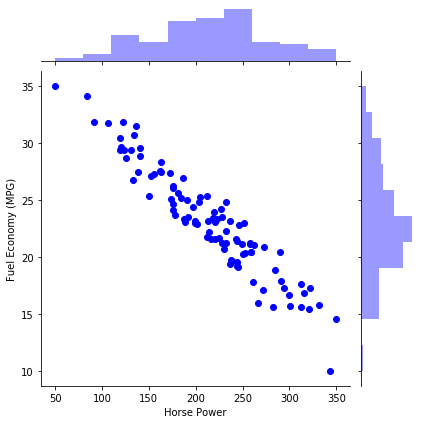

In [7]:
# Note a correlação inversa entre as variáveis, ou seja, quando uma aumenta a outra diminui

sns.jointplot('Horse Power', 'Fuel Economy (MPG)', data=fuel,  color='blue')

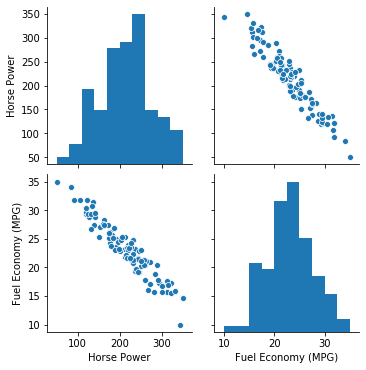

In [8]:
sns.pairplot(fuel)

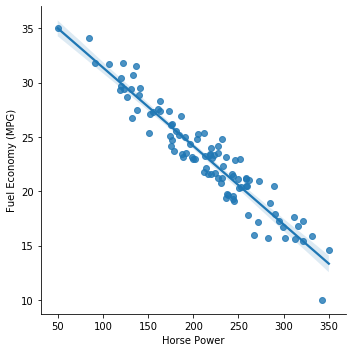

In [9]:
# O lmplot coloca a melhor linha reta possível no gráfico
# O seaborn já nos mostra se uma linha reta daria uma boa visão para esse conjunto de dados

sns.lmplot('Horse Power', 'Fuel Economy (MPG)', data=fuel)

# PASSO 4: CRIAR DATASET DE TREINO E TESTE
Primeiro: divide as variáveis em X e y

Uma é a independente e a outra é a dependente, que queremos prever.

In [10]:
# Observe o 'X' em caixa alta

X = fuel[['Horse Power']]

In [11]:
X

,Horse Power
0,118.770799
1,176.326567
2,219.262465
3,187.310009
4,218.594340
...,...
95,162.810542
96,266.869640
97,243.831211
98,140.959803


In [12]:
y = fuel['Fuel Economy (MPG)']

In [13]:
y

0     29.344195
1     24.695934
2     23.952010
3     23.384546
4     23.426739
        ...    
95    27.418661
96    15.989945
97    19.253375
98    29.515593
99    25.196097
Name: Fuel Economy (MPG), Length: 100, dtype: float64

In [14]:
# Vamos importar o sickitlearn para agora dividir em treino e teste
# O train_test_split é uma classe responsável por dividir os dados como quisermos, para treino e teste
# train_test_split e usar Shift+Tab para ver informações da classe

from sklearn.model_selection import train_test_split

In [15]:
# Abaixo estamos criando os dados de teste e treino
# Note que passamos os inputs e outputs para a classe train_test_split, bem como o tamanho do conjunto para teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Vamos dar uma olhada em X_train

X_train

,Horse Power
55,199.147638
88,203.571654
26,258.424223
42,243.737242
69,315.817498
...,...
60,230.462677
71,299.530458
14,211.729109
92,227.380124


In [17]:
# Assim como no meu outro projeto de Regressão Linear Simples, notamos o número menor de dados de teste

X_test.head(5)

,Horse Power
83,232.216607
53,250.709289
70,223.179649
45,132.669569
44,227.670465


# PASSO 5: TREINAR O MODELO

In [18]:
# Esse método nos diz a forma do cojunto de dados, no caso

X_train.shape

(80, 1)

In [19]:
# Vamos importar a classe Linear Regression
# Depois criaremos a variável 'regressor' com a classe importada

from sklearn.linear_model import LinearRegression

In [20]:
# Quando colocamos o fit_intercept como True estamos basicamente pedindo para o LinearRegressor 
# obter os 2 parâmetros: slope (m) e o y-intercept (b)
# Colocando o True estamos assumindo que há y-intercept para retornar
# Com False o b estará em 0

regressor = LinearRegression(fit_intercept = True)

In [21]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
# Vamos visualizar nosso modelo
# Estamos 'printando' o coeficiente e o intercept
# Basicamente esses são os dois parâmetros que estávamos procurando no projeto

print('Linear Model Coefficient (m)', regressor.coef_)
print('Linear Model Coefficient (b)', regressor.intercept_)

Linear Model Coefficient (m) [-0.0733005]
Linear Model Coefficient (b) 38.8772590824773


# PASSO 6: TESTAR O MODELO
Relembrando, no 'regressor' é onde está nosso modelo, toda a 'inteligência'

O regressor.predict(X_test) deverá gerar a predição de y, por isso y_predict

Nós simplesmente estamos usando os dados acima na equação do modelo (y = mx + b)

In [23]:
y_predict = regressor.predict(X_test)

In [24]:
y_predict

array([21.85566531, 20.50014248, 22.51807886, 29.1525131 , 22.18889979,
       20.36504254, 29.93165405, 24.29351481, 15.28617054, 30.17129996,
       29.79637526, 13.22208354, 19.68336809, 18.16222608, 21.45570273,
       22.85418435, 23.15543817, 15.3513636 , 27.48523469, 25.97789405])

In [25]:
y_test.head(5)

83    21.216359
53    20.291766
70    23.307192
45    26.778148
44    21.205987
Name: Fuel Economy (MPG), dtype: float64

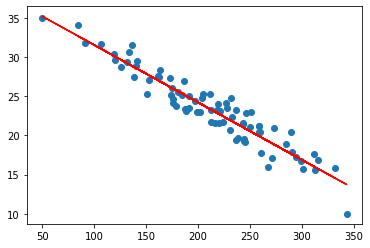

In [26]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), color = 'red')

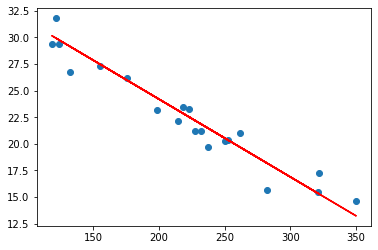

In [27]:
plt.scatter(X_test, y_test)
plt.plot(X_test, regressor.predict(X_test), color = 'red')

In [55]:
HP = [[150]]

In [56]:
new_car = regressor.predict(HP)

In [57]:
new_car

array([27.88218385])

## Obs: perceba que se colocássemos o fit_intercept como 'False' ele forçaria a linha passar pelo valor 0, o que distorceria completamente nosso modelo.

In [29]:
regressor2 = LinearRegression(fit_intercept = False)

In [32]:
regressor2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [33]:
# Observe o 'b' = 0

print('Linear Model Coefficient (m)', regressor2.coef_)
print('Linear Model Coefficient (b)', regressor2.intercept_)

Linear Model Coefficient (m) [0.09647489]
Linear Model Coefficient (b) 0.0


In [34]:
y_predict = regressor2.predict(X_test)
y_predict

array([22.40307218, 24.18715164, 21.53123264, 12.79928244, 21.96448364,
       24.36496424, 11.77381143, 19.19448202, 31.04955192, 11.45840003,
       11.95185941, 33.76621234, 25.26215413, 27.26421426, 22.92948532,
       21.08886539, 20.69236838, 30.96374769, 14.99368087, 16.97757625])

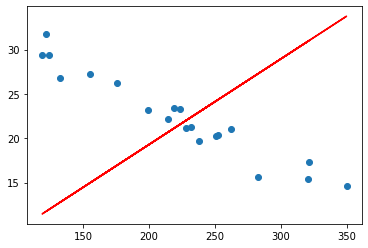

In [35]:
# O modelo sendo forçado a 'passar' por 0

plt.scatter(X_test, y_test)
plt.plot(X_test, regressor2.predict(X_test), color = 'red')